# 🔮 Importaciones necesarias para el proyecto

In [19]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Imprime la versión de OpenCV
print(f"Versión de OpenCV: {cv2.__version__}")  
# Imprime la versión de Numpy
print(f"Versión de Numpy: {np.__version__}")   
# Imprime la versión de Pandas
print(f"Versión de Pandas: {pd.__version__}")   
# Imprime la versión de TensorFlow
print(f"Versión de TensorFlow: {tf.__version__}")  
# Imprime la versión de Sklearn
print(f"Version de Sklearn: {sk.__version__}")    
# Imprime la versión de Matplotlib
print(f"Versión de Matplotlib.pyplot: {mpl.__version__}")  

Versión de OpenCV: 4.8.1
Versión de Numpy: 1.21.5
Versión de Pandas: 1.3.5
Versión de TensorFlow: 2.1.0
Version de Sklearn: 1.0.2
Versión de Matplotlib.pyplot: 3.5.3


In [3]:
# Obtiene el nombre del dispositivo GPU
device_name = tf.test.gpu_device_name()

# Comprueba si el nombre del dispositivo no es '/device:GPU:0'
if device_name != '/device:GPU:0':
    # Genera un error del sistema si no se encuentra un dispositivo GPU
    raise SystemError('GPU device not found')

# Imprime el mensaje indicando que se encontró una GPU y muestra el nombre del dispositivo
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 📂 Configuraciones del path para lectura

In [4]:
# Cambia el directorio de trabajo actual al directorio padre
os.chdir("..")  
# Imprime el directorio de trabajo actual después del cambio
print(os.getcwd()) 

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier


In [5]:
# Obtenemos la dirección actual del path donde se está ejecutando el Jupyter Notebook
cwd = os.getcwd()

# Nos movemos a la carpeta donde se encuentran las imágenes a testear
os.chdir(f"{cwd}/classifier_resized_VGG16/")

# Imprime el directorio de trabajo actual después del cambio
print(os.getcwd())  

# Guardamos la dirección actual en la variable "principal_directory" para su posterior uso
principal_directory = os.getcwd()

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\classifier_resized_MobileNetV2


In [6]:
# Listamos los archivos de la ruta
print(os.listdir())

['speeds', 'stops', 'trafficLights']


# 🧐 Lectura de imágenes

In [7]:
# Inicializamos listas para almacenar imágenes y etiquetas
images = []  # Lista de imágenes
labels = []  # Lista de etiquetas

i = 0  # Inicializamos una variable para llevar el seguimiento de las etiquetas

# Iteramos sobre las carpetas dentro del directorio principal
for folder in os.listdir(principal_directory):
    folder_path = os.path.join(principal_directory, folder)
    
    # Verificamos si el elemento en el directorio es una carpeta
    if os.path.isdir(folder_path):
        
        # Etiqueta de la carpeta, que corresponde a la clase
        label = i
        
        # Iteramos sobre los archivos dentro de la carpeta
        for file in os.listdir(folder_path):
            archivo_path = os.path.join(folder_path, file)
            
            # Leemos la imagen con OpenCV y la agregamos a la lista de imágenes
            image = cv2.imread(archivo_path)
            
            # Convertimos la imagen al espacio de color RGB desde BGR (formato por defecto de OpenCV)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Normalizamos los valores de la imagen de 0 a 1
            normalized_img = image / 255.0
            images.append(normalized_img)
            labels.append(label)
            
    i += 1  # Incrementamos la etiqueta para la próxima clase
            
# Creamos un DataFrame a partir de las listas de imágenes y etiquetas
data = {'Images': images, 'Labels': labels}
df = pd.DataFrame(data)            
            
# Selecciona un índice aleatorio dentro del rango de las imágenes
index = np.random.randint(0, len(images))

# Imprime los valores de píxeles de una ubicación específica (5, 5) en la imagen antes de la normalización
print("Pixeles de la imagen antes de la normalización: ", images[index][5][5] * 255)
# Imprime los valores de píxeles de la misma ubicación (5, 5) en la imagen después de la normalización
print("Pixeles de la imagen después de la normalización: ", images[index][5][5])

print("-------------------------------------------------------------------------------")

# Imprime la cantidad total de imágenes en la lista
print("Cantidad de imágenes: ", len(images))
# Imprime la cantidad total de etiquetas en la lista
print("Cantidad de etiquetas: ", len(labels))

Pixeles de la imagen antes de la normalización:  [222. 227. 231.]
Pixeles de la imagen después de la normalización:  [0.87058824 0.89019608 0.90588235]
-------------------------------------------------------------------------------
Cantidad de imágenes:  600
Cantidad de etiquetas:  600


In [8]:
# Cambia al directorio padre
os.chdir("..")  
# Nos movemos a la carpeta 'classifier' dentro del directorio padre
os.chdir(f"{cwd}/classifier/")
# Imprime el directorio de trabajo actual después de los cambios 
print(os.getcwd())  

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\classifier


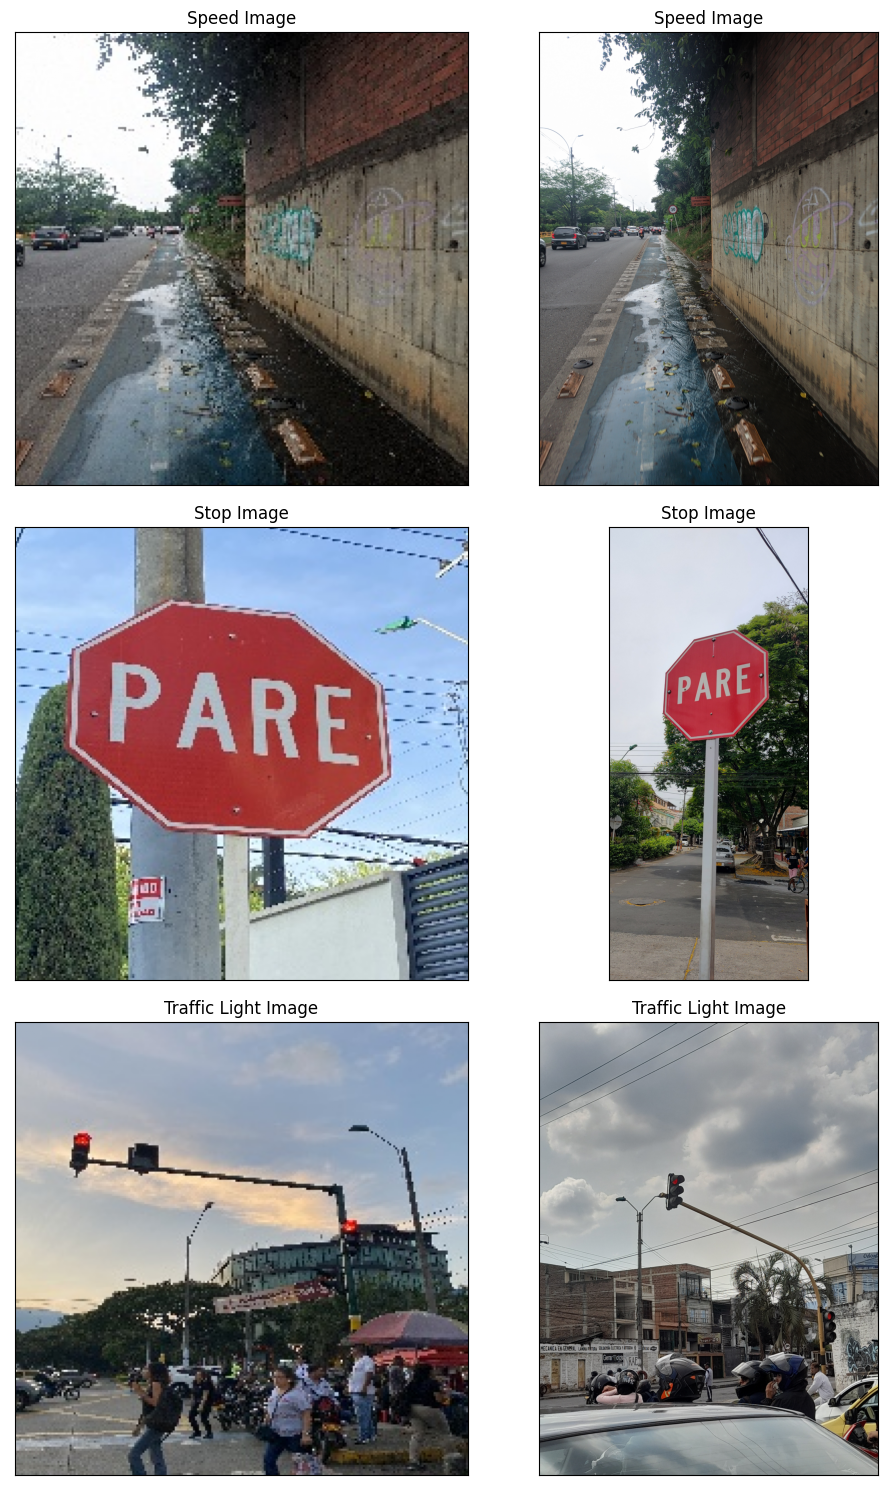

In [9]:
# Inicializa la figura con un tamaño específico
plt.figure(figsize=(10, 15))

# Selecciona un índice aleatorio para la categoría "Speed" dentro del rango 0-199
indexSpeed = np.random.randint(0, 199)

# Crea el primer subplot para mostrar una imagen de la categoría "Speed"
plt.subplot(3, 2, 1), plt.imshow(images[indexSpeed])
plt.gca().set_title('Speed Image')  # Establece el título del subplot
plt.xticks([]), plt.yticks([])  # Oculta las marcas en los ejes

# Lee y muestra otra imagen de la categoría "Speed" desde una ubicación específica
image_speed = cv2.cvtColor(cv2.imread(f"speeds/Velocidad-{indexSpeed + 1}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 2), plt.imshow(image_speed)
plt.gca().set_title('Speed Image')
plt.xticks([]), plt.yticks([])

# Selecciona un índice aleatorio para la categoría "Stop" dentro del rango 199-398
indexStop = np.random.randint(199, 399)

# Crea el subplot para mostrar una imagen de la categoría "Stop"
plt.subplot(3, 2, 3), plt.imshow(images[indexStop])
plt.gca().set_title('Stop Image')
plt.xticks([]), plt.yticks([])

# Lee y muestra otra imagen de la categoría "Stop" desde una ubicación específica
image_stop = cv2.cvtColor(cv2.imread(f"stops/Pare-{indexStop - 200}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 4), plt.imshow(image_stop)
plt.gca().set_title('Stop Image')
plt.xticks([]), plt.yticks([])

# Selecciona un índice aleatorio para la categoría "Traffic Light" dentro del rango 400-558
indexTrafficLight = np.random.randint(400, 559)

# Crea el subplot para mostrar una imagen de la categoría "Traffic Light"
plt.subplot(3, 2, 5), plt.imshow(images[indexTrafficLight])
plt.gca().set_title('Traffic Light Image')
plt.xticks([]), plt.yticks([])

# Lee y muestra otra imagen de la categoría "Traffic Light" desde una ubicación específica
image_trafficlight = cv2.cvtColor(cv2.imread(f"trafficLights/Semaforo-{indexTrafficLight - 400}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 6), plt.imshow(image_trafficlight)
plt.gca().set_title('Traffic Light Image')
plt.xticks([]), plt.yticks([])

# Ajusta el diseño de los subplots para una visualización más ordenada
plt.tight_layout()

# Muestra la figura con los subplots
plt.show()

In [10]:
# Muestra todas las filas del DataFrame 'df' excepto la última
df.head()

,Images,Labels
0,"[[[0.7411764705882353, 0.7764705882352941, 0.8...",0
1,"[[[0.7098039215686275, 0.7294117647058823, 0.7...",0
2,"[[[0.11764705882352941, 0.34901960784313724, 0...",0
3,"[[[0.5215686274509804, 0.5568627450980392, 0.5...",0
4,"[[[0.11764705882352941, 0.3607843137254902, 0....",0


### Data Augmentation

In [12]:
# Convierte la lista de imágenes en un arreglo NumPy
x = np.array(df.Images.tolist())
# Convierte la lista de etiquetas en un arreglo NumPy
y = np.array(df.Labels.tolist())
# Reorganiza la matriz de etiquetas para que tenga la forma adecuada (número de ejemplos, 1)
y = y.reshape((y.shape[0], -1))

In [13]:
# Definimos las transformaciones para el aumento de datos utilizando ImageDataGenerator
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,          # Rango de rotación en grados
    zoom_range=0.2,            # Rango de zoom
    horizontal_flip=True,      # Volteo horizontal aleatorio
    vertical_flip=True,        # Volteo vertical aleatorio
    fill_mode='constant'       # Modo de llenado para píxeles fuera de los límites de la imagen original
)

In [14]:
# Crea un generador de datos de entrenamiento utilizando train_datagen
train_gen = train_datagen.flow(
    x=x,          # Datos de entrada (imágenes)
    y=y,          # Etiquetas correspondientes a las imágenes
    batch_size=32 # Tamaño del lote (batch size) para generar lotes de datos
)

In [15]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba, con un 20% para prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50, stratify=y)

# Número de clases en el problema (en este caso, 3 clases)
num_classes = 3

# Convierte las etiquetas de entrenamiento y prueba en codificación one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Imprime las dimensiones de los conjuntos de datos
print(f"X_Train: {x_train.shape}")  # Dimensiones del conjunto de entrenamiento de características
print(f"X_Test: {x_test.shape}")    # Dimensiones del conjunto de prueba de características
print(f"Y_Train: {y_train.shape}")  # Dimensiones del conjunto de entrenamiento de etiquetas
print(f"Y_Test: {y_test.shape}")    # Dimensiones del conjunto de prueba de etiquetas

X_Train: (480, 224, 224, 3)
X_Test: (120, 224, 224, 3)
Y_Train: (480, 3)
Y_Test: (120, 3)


## Build the model

### Model taked from: [Kaggle](https://www.kaggle.com/code/yacharki/traffic-signs-image-classification-96-cnn)

In [21]:
def VGG16(input_shape=(224, 224, 3), num_classes=1000):
    model = Sequential([
        # Block 1
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 2
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 3
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 4
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 5
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        # Classification block
        Flatten(),
        Dense(516, activation='relu'),
        Dense(516, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

# Create the VGG16 model
model = VGG16()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

In [22]:
# Subimos un nivel en el explorador de archivos
os.chdir("..")  # Cambia al directorio padre
os.chdir(f"{cwd}/models/")  # Nos movemos a la carpeta 'models' dentro del directorio padre
model_directory = os.getcwd()  # Guardamos la dirección actual en la variable 'model_directory'
print(os.getcwd())  # Imprime el directorio de trabajo actual después de los cambios

# Listamos los archivos en la ruta actual
print(os.listdir())  

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\models
['best_modelV1.h5', 'ModelV1.h5']


In [24]:
# Callback ModelCheckpoint para guardar el modelo con la mejor precisión en entrenamiento
checkpoint = ModelCheckpoint(
    filepath='ModelV2_VGG16.h5',  # Nombre del archivo donde se guardará el modelo
    monitor='accuracy',  # Métrica que se supervisará (precisión en entrenamiento)
    mode='max',  # Modo 'max' para guardar el mejor modelo basado en la métrica
    save_best_only=True  # Guarda solo el mejor modelo
    # save_weights_only=True  # Opcional: guardar solo los pesos del modelo en lugar de todo el modelo
)

# Callback EarlyStopping para detener el entrenamiento si la precisión en validación no mejora
stopping = EarlyStopping(
    monitor='val_accuracy',  # Métrica que se supervisará (precisión en validación)
    patience=50,  # Número de épocas sin mejora antes de detener el entrenamiento
    mode='max',  # Modo 'max' para detener el entrenamiento si la métrica aumenta
    restore_best_weights=True  # Restaura los mejores pesos del modelo cuando se detiene el entrenamiento
)

In [31]:
# Iniciamos el tiempo de entrenamiento
start = time.time()

# Utilizamos la GPU con '/GPU:0' para entrenar el modelo
with tf.device('/GPU:0'):
    # Entrenamos el modelo utilizando los datos de entrenamiento y validación, con un total de 400 épocas
    history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test), callbacks=[checkpoint, stopping])

# Finalizamos el tiempo de entrenamiento
finish = time.time()

# Imprimimos el tiempo que tomó el entrenamiento
print(f"Se demoró: {finish - start} segundos.")

Train on 480 samples, validate on 120 samples
Epoch 1/400
480/480 [==============================] - 1s 3ms/sample - loss: 18.4100 - accuracy: 0.3125 - val_loss: 7.7989 - val_accuracy: 0.3333
Epoch 2/400
480/480 [==============================] - 1s 1ms/sample - loss: 4.4449 - accuracy: 0.3250 - val_loss: 2.4028 - val_accuracy: 0.3333
Epoch 3/400
480/480 [==============================] - 0s 1ms/sample - loss: 2.0269 - accuracy: 0.3313 - val_loss: 1.7952 - val_accuracy: 0.3333
Epoch 4/400
480/480 [==============================] - 1s 1ms/sample - loss: 1.6711 - accuracy: 0.3833 - val_loss: 1.5353 - val_accuracy: 0.5333
Epoch 5/400
480/480 [==============================] - 0s 972us/sample - loss: 1.4018 - accuracy: 0.4729 - val_loss: 1.3905 - val_accuracy: 0.5250
Epoch 6/400
480/480 [==============================] - 0s 975us/sample - loss: 1.2486 - accuracy: 0.5146 - val_loss: 1.2433 - val_accuracy: 0.5583
Epoch 7/400
480/480 [==============================] - 0s 1ms/sample - loss: 1.

In [39]:
# Evaluar el modelo en el conjunto de prueba y obtener la pérdida y la precisión
loss, acc = model.evaluate(x_test, y_test, verbose=1)

# Imprimir la pérdida y la precisión
print("Loss:{0} - Accuracy:{1}".format(loss, acc))

# Guardar el mejor modelo en un archivo llamado "best_modelV1.h5"
save_model(model, "best_modelV1.h5")

120/120 [==============================] - 0s 967us/sample - loss: 0.8377 - accuracy: 0.7500
Loss:0.8376972198486328 - Accuracy:0.75


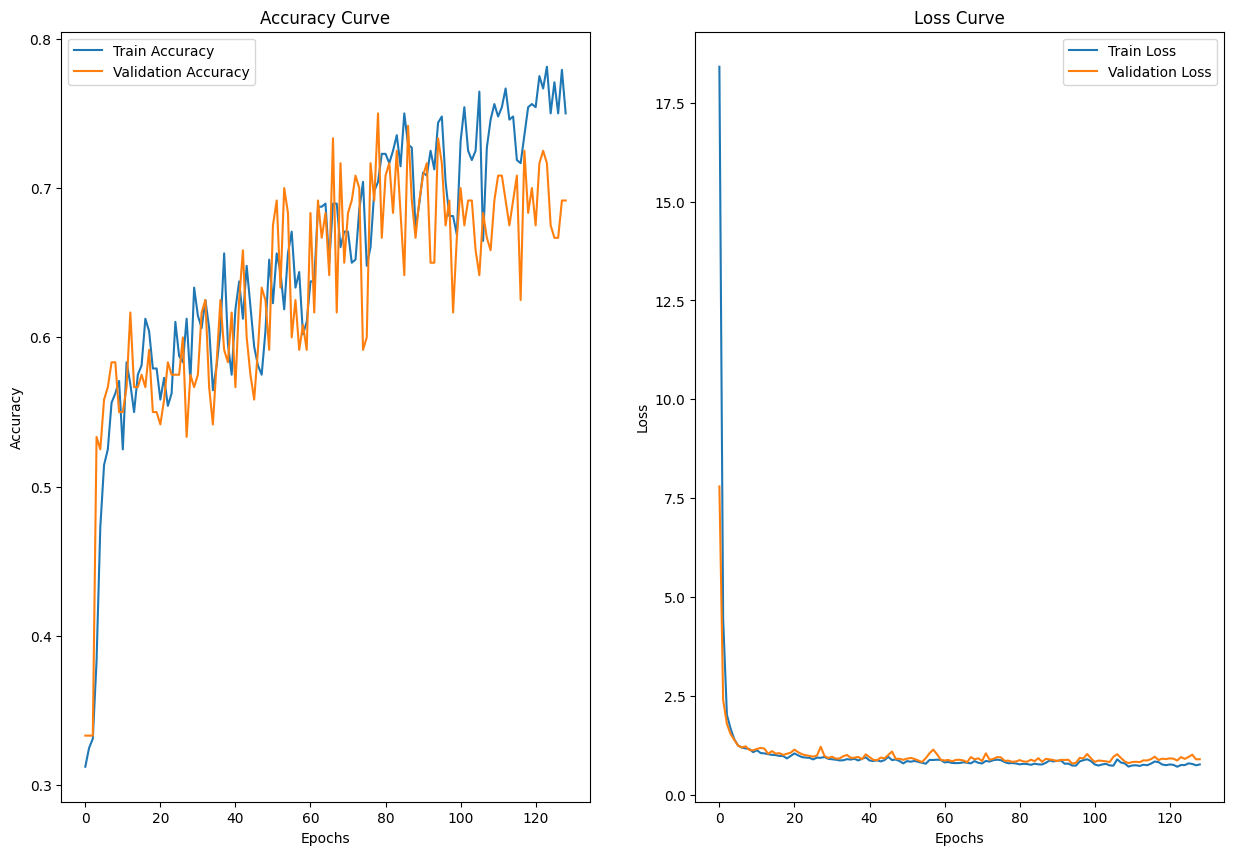

In [40]:
# Crear una figura con dos subplots
plt.figure(figsize=(15, 10))

# Subplot para graficar la precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Precisión en entrenamiento
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Precisión en validación
plt.title('Accuracy Curve')  # Título del subplot
plt.xlabel('Epochs')  # Etiqueta del eje x
plt.ylabel('Accuracy')  # Etiqueta del eje y
plt.legend()  # Mostrar leyenda

# Subplot para graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')  # Pérdida en entrenamiento
plt.plot(history.history['val_loss'], label='Validation Loss')  # Pérdida en validación
plt.title('Loss Curve')  # Título del subplot
plt.xlabel('Epochs')  # Etiqueta del eje x
plt.ylabel('Loss')  # Etiqueta del eje y
plt.legend()  # Mostrar leyenda

# Mostrar las gráficas
plt.show()

               precision    recall  f1-score   support

        Speed       0.68      0.68      0.68        40
         Stop       0.91      0.80      0.85        40
Traffic-Light       0.69      0.78      0.73        40

     accuracy                           0.75       120
    macro avg       0.76      0.75      0.75       120
 weighted avg       0.76      0.75      0.75       120

------------------------------------------------------------------------------


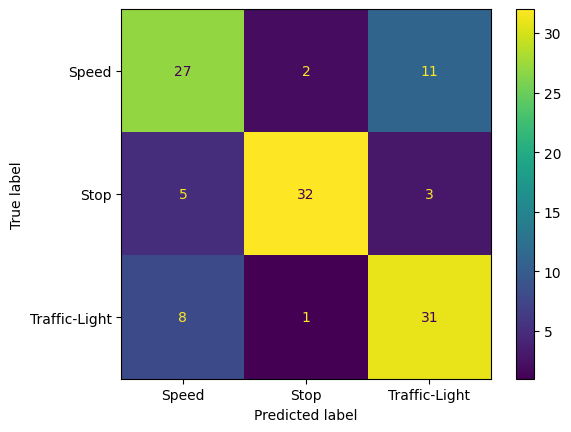

In [46]:
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Convierte las matrices codificadas one-hot a etiquetas de clase
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Define las etiquetas de clase correspondientes a tus clases
clases = ["Speed", "Stop", "Traffic-Light"]

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test_labels, y_pred_labels, labels=range(len(clases)))

# Imprime el informe de clasificación que incluye precision, recall y f1-score por clase
print(classification_report(y_test_labels, y_pred_labels, target_names=clases))

print("------------------------------------------------------------------------------")

# Crea un gráfico de matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=clases)
disp.plot()

# Mostrar las gráficas
plt.show()

In [42]:
# Subimos un nivel en el explorador de archivos
os.chdir("..")  # Cambia al directorio padre
os.chdir(f"{cwd}/model_test/")  # Nos movemos a la carpeta 'model_test' dentro del directorio padre
test_directory = os.getcwd()  # Guardamos la dirección actual en la variable 'test_directory'

# Imprime el directorio de trabajo actual después de los cambios
print(os.getcwd())  

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\model_test


In [43]:
# Función para cargar y preprocesar una imagen
def convert_image(path):
    # Lee la imagen desde la ruta especificada
    img = cv2.imread(path)
    # Convierte la imagen de BGR (formato por defecto de OpenCV) a RGB
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Redimensiona la imagen a un tamaño específico (150x150 píxeles en este caso)
    resized_img = cv2.resize(img_color, (150, 150))
    # Normaliza los valores de píxeles de la imagen de 0 a 1
    normalized_img = resized_img / 255.0
    
    return normalized_img

# Función para darle la forma adecuada a la imagen para ser utilizada en el modelo
def reshape_image(img):
    # Reorganiza la imagen para que tenga la forma adecuada (1, 150, 150, 3)
    good_image = np.reshape(img, (1, 150, 150, 3))
    
    return good_image

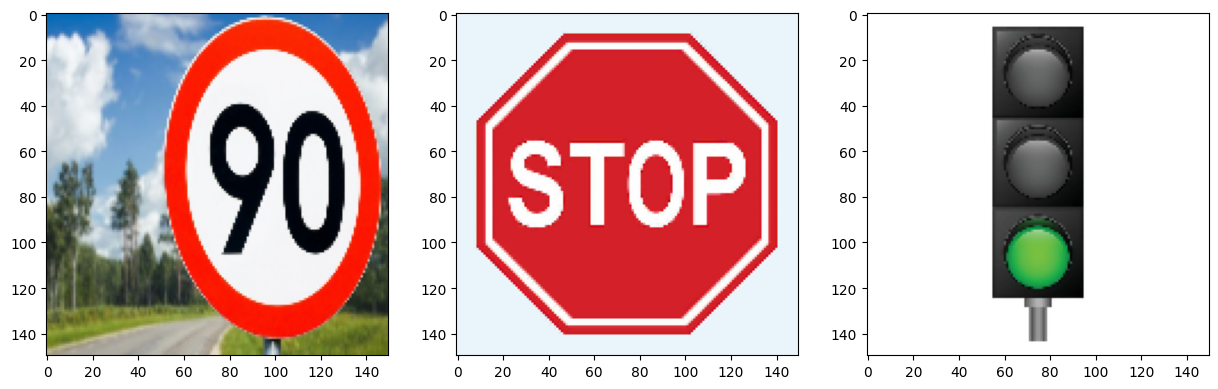

In [47]:
# Lee las imágenes y las preprocesa utilizando la función 'convert_image'
image_Test_Speed = convert_image(f"{test_directory}/speed-1.jpg")
image_Test_Stop = convert_image(f"{test_directory}/stop-1.jpg")
image_Test_Traffic_Light = convert_image(f"{test_directory}/trafficlight-1.jpg")

# Crea una figura para mostrar las imágenes
plt.figure(figsize=(15, 10))

# Muestra las imágenes en subplots
plt.subplot(1, 3, 1), plt.imshow(image_Test_Speed)  # Subplot para la imagen de velocidad
plt.subplot(1, 3, 2), plt.imshow(image_Test_Stop)   # Subplot para la imagen de stop
plt.subplot(1, 3, 3), plt.imshow(image_Test_Traffic_Light)  # Subplot para la imagen de semáforo

# Mostrar las gráficas
plt.show()

# Da forma adecuada a las imágenes para ser procesadas por el modelo utilizando la función 'reshape_image'
image_Test_Speed = reshape_image(image_Test_Speed)
image_Test_Stop = reshape_image(image_Test_Stop)
image_Test_Traffic_Light = reshape_image(image_Test_Traffic_Light)

In [45]:
# Predicción para la imagen de velocidad
start = time.time()
y_pred_speed = model.predict(image_Test_Speed)
print("SPEED == 0")
# Imprime la clase predicha (0: Speed)
print("Predicción: ", y_pred_speed.argmax()) 
finish = time.time()
print(f"Speed se demoró: {finish - start} segundos.")
print("--------------------------------------------------------------------")

# Predicción para la imagen de stop
start = time.time()
print("STOP == 1")
y_pred_stop = model.predict(image_Test_Stop)
# Imprime la clase predicha (1: Stop)
print("Predicción: ", y_pred_stop.argmax())  
finish = time.time()
print(f"Stop se demoró: {finish - start} segundos.")
print("--------------------------------------------------------------------")

# Predicción para la imagen de semáforo
start = time.time()
print("TRAFFIC LIGHT == 2")
y_pred_trafficlight = model.predict(image_Test_Traffic_Light)
# Imprime la clase predicha (2: Traffic-Light)
print("Predicción: ", y_pred_trafficlight.argmax())  
finish = time.time()
print(f"Traffic Light se demoró: {finish - start} segundos.")
print("--------------------------------------------------------------------")

SPEED == 0
Predicción:  0
Speed se demoró: 0.015521049499511719 segundos.
--------------------------------------------------------------------
STOP == 1
Predicción:  1
Stop se demoró: 0.015028953552246094 segundos.
--------------------------------------------------------------------
TRAFFIC LIGHT == 2
Predicción:  2
Traffic Light se demoró: 0.016528606414794922 segundos.
--------------------------------------------------------------------
